## Emphasis:
    
Probability Concepts:

- Expectation
- Expectation: a Linear Operator
- Variance
- Variance:  NOT a linear operator
    
Python Concepts:

- numpy array
- numpy dot
- numpy to panda DataFrame
- random choice (random number generator)
- scipy.stats mean, variance 
- scipy.stats specific distributions:  Binominal, Negative Binomial, Poisson, Normal
- graphing:

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/envs/dsi/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Expectation of a Random Variable is really a average of possible outcomes where the outcomes are weighted by the probability of the outcome ocurring.

Lottery ticket example of "Expectation"

In [3]:
Payouts = [1,5,10,100,1000, 1000000]
Probabilities = [.2,.1,.15,.0075,.000003,.0000000002]

#confirm:  Probabilities
sumP = sum(Probabilities)
print sumP, len(Payouts), len(Probabilities)

# Probabilities must sum to 1.  What to do?

0.4575030002 6 6


In [4]:
# add Payout Zero Payout to the lists
Payouts.append(0)
Probabilities.append(1-sumP)

sumP = sum(Probabilities)
print sumP, len(Payouts), len(Probabilities)
Expected_Payout=np.dot(Payouts,Probabilities) #note the dot product of vectors
Expected_Payout


1.0 7 7


2.9531999999999998

Create a random variable X (die roll) dataframe of outcomes and associated probabilities for illustration

In [5]:
x = [[1,1.0/6,],[2,1.0/6],[3,1.0/6],[4,1.0/6],[5,1.0/6],[6,1.0/6]]
c = ['X','Prob(X)']
z=np.array(x)
df_fair = pd.DataFrame(z,columns=c)
df_fair

,X,Prob(X)
0,1.0,0.166667
1,2.0,0.166667
2,3.0,0.166667
3,4.0,0.166667
4,5.0,0.166667
5,6.0,0.166667


Add a column that shows the outcome multiplied by it's probabability

In [6]:
df_fair = pd.DataFrame(z,columns=c)
df_fair["X * Prob(X)"] = df_fair["X"]*df_fair["Prob(X)"]
df_fair

,X,Prob(X),X * Prob(X)
0,1.0,0.166667,0.166667
1,2.0,0.166667,0.333333
2,3.0,0.166667,0.500000
3,4.0,0.166667,0.666667
4,5.0,0.166667,0.833333
5,6.0,0.166667,1.000000


Calculate the expected value from the dataframe

In [7]:
Expected_X = np.sum(df_fair["X * Prob(X)"])
print "Expected Value(X) aka E[X]: ", Expected_X

z = np.dot(df_fair['X'],df_fair['Prob(X)'])
print "Alternatively: Expected Value(X) aka E[X]: ", z

#Note just putting this in dataframes for illustration

Expected Value(X) aka E[X]:  3.5
Alternatively: Expected Value(X) aka E[X]:  3.5


Do the same for an "unfair" die i.e. probabilities are not the same pre die face

In [8]:
y = [[1,1.0/12,],[2,1.0/12],[3,1.0/12],[4,1.0/12],[5,2.0/6],[6,2.0/6]] #5 and 6, 4 times as likely
c = ['Y','Prob(Y)']
z=np.array(y)
df_unfair = pd.DataFrame(z,columns=c)
df_unfair["Y * Prob(Y)"] = df_unfair["Y"]*df_unfair["Prob(Y)"]
df_unfair

,Y,Prob(Y),Y * Prob(Y)
0,1.0,0.083333,0.083333
1,2.0,0.083333,0.166667
2,3.0,0.083333,0.250000
3,4.0,0.083333,0.333333
4,5.0,0.333333,1.666667
5,6.0,0.333333,2.000000


In [9]:
Expected_Y = np.sum(df_unfair["Y * Prob(Y)"])
print "E[Y] aka mean: ", Expected_Y
z = np.dot(df_unfair['Y'],df_unfair['Prob(Y)'])
print "Alternatively: Expected Value(Y) aka E[Y]: ", z

E[Y] aka mean:  4.5
Alternatively: Expected Value(Y) aka E[Y]:  4.5


Expectation is a linear operator:   If a and c are scalars, and Z = aY + c, then E[Z] =  E[aY + c] = aE[Y] + c

In [10]:
#What is the Expectation of Z, where Z = 5*Y + 12?   For illustrative purposes only, 
#here's the long way set up
a = 5
c = 12

df_unfair["Z = 5Y+12"] = df_unfair["Y"]*a + c
df_unfair["Prob(Z)"] = df_unfair["Prob(Y)"] #why?
df_unfair["Z * Prob(Z)"] = df_unfair["Z = 5Y+12"]*df_unfair["Prob(Z)"]
df_unfair


,Y,Prob(Y),Y * Prob(Y),Z = 5Y+12,Prob(Z),Z * Prob(Z)
0,1.0,0.083333,0.083333,17.0,0.083333,1.416667
1,2.0,0.083333,0.166667,22.0,0.083333,1.833333
2,3.0,0.083333,0.250000,27.0,0.083333,2.250000
3,4.0,0.083333,0.333333,32.0,0.083333,2.666667
4,5.0,0.333333,1.666667,37.0,0.333333,12.333333
5,6.0,0.333333,2.000000,42.0,0.333333,14.000000


In [11]:
Expected_Z = np.sum(df_unfair["Z * Prob(Z)"])
print "long way E[Z]: ", Expected_Z

#using the face that Expectation is a linear operator
Expected_Z = a*Expected_Y + c
print "using knowledge of linear operators E[Z]: ", Expected_Z
 

long way E[Z]:  34.5
using knowledge of linear operators E[Z]:  34.5


Roll some dice randomly and see compare the results to the expected values

Let's roll some dice.   We will look at three situations
1) Rolling Two Fair dice:
2) Rolling Two Unfair dice
3) Rolling One of each

We will roll them a bunch of time randomly and then graph the results.   In advance, calculate

1) E(X) + E(X) 

2) E(Y) + E(Y)

3) E(X) + E(Y)

In [12]:
#Set up some lists which we will choose from random to reflect the dice rolls

die_sides = [1,2,3,4,5,6]

prob_X = df_fair["Prob(X)"].tolist()
prob_Y = df_unfair["Prob(Y)"].tolist()

X_total, Y_total, X_Y_total = [],[],[]
number_of_rolls = 100000  # hands will be tired

for n in range(0,number_of_rolls):
    X_sum = np.random.choice(die_sides, 1, p=prob_X) + np.random.choice(die_sides, 1, p=prob_X)
    X_total.append(X_sum)
    Y_sum = np.random.choice(die_sides, 1, p=prob_Y) + np.random.choice(die_sides, 1, p=prob_Y)
    Y_total.append(Y_sum)    
    X_Y_sum = np.random.choice(die_sides, 1, p=prob_X)+np.random.choice(die_sides, 1, p=prob_Y)
    X_Y_total.append(X_Y_sum)

#np.random.choice(aa_milne_arr, 5, p=[0.5, 0.1, 0.1, 0.3])

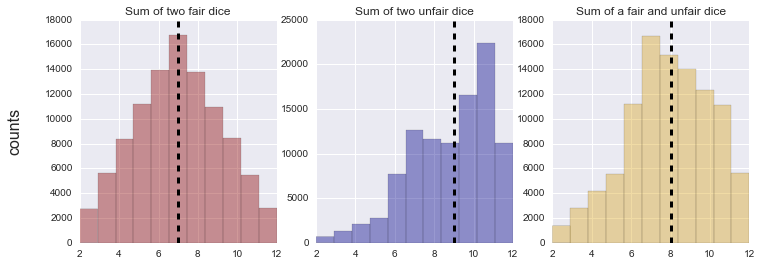

In [13]:
X_avg = np.mean(X_total)
Y_avg = np.mean(Y_total)
X_Y_avg = np.mean(X_Y_total)

fig, ax_array = plt.subplots(1, 3, figsize=(12,4))

ax_array[0] = sns.distplot(X_total, bins=11, hist=True, kde=False,
                   ax=ax_array[0],color='darkred')

ax_array[0].set_ylabel('counts\n', fontsize=16)
ax_array[0].set_title('Sum of two fair dice', fontsize=12)
ax_array[0].axvline(X_avg, lw=3, ls='dashed', color='black')

ax_array[1] = sns.distplot(Y_total, bins=11, hist=True, kde=False,
                   ax=ax_array[1],color='darkblue')
#ax_array[1].set_ylabel('counts\n', fontsize=16)
ax_array[1].set_title('Sum of two unfair dice', fontsize=12)
ax_array[1].axvline(Y_avg, lw=3, ls='dashed', color='black')

ax_array[2] = sns.distplot(X_Y_total, bins=11, hist=True, kde=False,
                   ax=ax_array[2],color='goldenrod')
#ax_array[2].set_ylabel('counts\n', fontsize=16)
ax_array[2].set_title('Sum of a fair and unfair dice', fontsize=12)
ax_array[2].axvline(X_Y_avg, lw=3, ls='dashed', color='black')

plt.show()

In [14]:
print "X mean: ", Expected_X * 2, " X sample average: ", X_avg 
print "Y mean: ", Expected_Y * 2, " Y sample average: ", Y_avg 
print "X + Y  mean: ", Expected_X + Expected_Y , " X + Y sample average: ", X_Y_avg 


X mean:  7.0  X sample average:  6.99494
Y mean:  9.0  Y sample average:  9.00339
X + Y  mean:  8.0  X + Y sample average:  7.99818


Key points:

Expected values are a weighted average of outcomes, where the weight is a probability.
E[X] is often called the mean. 
Expectation is a linear operator, but cannot be used for all functions.  i.e. E[f(X)] does not equal to f(E[X]) in general.

If we rolled the dice 3 times then the "sample" averages / means could be quite different then the actual mean.  For most distributions, the sample mean will converge to the actual mean as n increases.  n here is the number of trials (dice rolls).

Note the examples above are discrete.  For a continuous distributions we "integrate" vs. sum (discrete) over the probability density function:  E[X] = intregate(x*pdf) over the set of possible outcomes

Like the Mean, Variance (or it's square root, standard deviation) is another parameter that helps describe the distribution.  Where the mean is a measure of central tendency, the variance is a measue of the spread (dispersion) of the distribution.

The formula for the Variance is as Var(X) = E[(X-E[X])^2].  From this formula you can see that the it is a probability weighted squared difference from the mean, E[X].

Note that Var(c * X) = c^2  * Var(X) and Var(X + b) = Var(X).  It is NOT a linear operator.

Simplied the Var(X) = E(X^2) - (E[X])^2  = E(X^2) - (mu)^2, where mu = E[X]

Using the X dataframe, calcuate the variance of X

In [15]:
df_fair

,X,Prob(X),X * Prob(X)
0,1.0,0.166667,0.166667
1,2.0,0.166667,0.333333
2,3.0,0.166667,0.500000
3,4.0,0.166667,0.666667
4,5.0,0.166667,0.833333
5,6.0,0.166667,1.000000


In [16]:
df_fair['X - E[X]'] = df_fair['X']-Expected_X
df_fair['(X - E[X])^2'] = df_fair['X - E[X]']**2
df_fair['Prob(X) * ((X - E[X])^2)'] = df_fair['(X - E[X])^2'] * df_fair['Prob(X)']

In [17]:
df_fair

,X,Prob(X),X * Prob(X),X - E[X],(X - E[X])^2,Prob(X) * ((X - E[X])^2)
0,1.0,0.166667,0.166667,-2.5,6.25,1.041667
1,2.0,0.166667,0.333333,-1.5,2.25,0.375000
2,3.0,0.166667,0.500000,-0.5,0.25,0.041667
3,4.0,0.166667,0.666667,0.5,0.25,0.041667
4,5.0,0.166667,0.833333,1.5,2.25,0.375000
5,6.0,0.166667,1.000000,2.5,6.25,1.041667


In [18]:
Variance_X = np.sum(df_fair["Prob(X) * ((X - E[X])^2)"])
print "Variance X: ",Variance_X

Variance X:  2.91666666667


The fair dice roll is an example of a random variable that is distributed (~) discrete Uniform.  Like many of the common (and not so common) you will find they are supported in scipy.stats and can pull the mean and variance easily.  Example below: 

In [19]:
dis_uni = stats.randint(1,7) # Note you might have expected 6 in the set up vs. 7 but this function is like range() in that regard
dis_uni.mean(), dis_uni.var()

(3.5, 2.9166666666666665)

Some Problems:

The mean and the variance of the random variable X have been identified above.  With that in mind, what is

Var(X + 5)
E(X+5)
Var(3X)
E(2X)
E(2X+5)
E(X^2)  This is known as the second moment where E[X] is the first moment


In [20]:
Vplus5 = Variance_X
Vplus5

# Think about what the informal definition of spread or variance is.  Why would adding five not impact the variance?  ans:
# Just as spread out, only moved over 5

2.9166666666666665

In [21]:
Eplus5 = Expected_X + 5
Eplus5
#use the informal definition of mean to explain

8.5

In [22]:
Var3X = (3**2)*Variance_X
Var3X

26.25

In [23]:
E2X = 2*Expected_X
E2X

7.0

In [24]:
E2XPlus5 = 2*Expected_X + 5
E2XPlus5 # A linear operation

12.0

In [25]:
#E[X^2] = ??? Think about this.  Hint:  Use the Formal Definition of the Variance and derive.

Look up these distributions in wikepedia and calculate the mean and the variance based on their associated parameters

N ~ Normal(0,3.2) (This means the random variable N is distributed Normally with mean 0 and standard deviation 3.2)

B ~ Binomial (n = 6, and p = .2)

P ~ Poisson ( Lambda = 6)

NB ~ Negative Binomial,  parameters (r = 2, p = .2) #please read the description on Wikipedia

http://docs.scipy.org/doc/scipy/reference/stats.html
    
https://en.wikipedia.org/wiki/List_of_probability_distributions
    
    

Go go Wikipedia and review the closed formula for each of these 4 distributions.   Calculate the mean and variance.  Normal is pretty much given and the Poisson you will find interesting.
With Scykit learn calculate the mean and variance and compare to your results.


In [26]:
norm = stats.norm(loc=0,scale=3.2)
print "Normal Mean: ", norm.mean()," Variance: ", norm.var()


Normal Mean:  0.0  Variance:  10.24


In [27]:
bin = stats.binom(15,.2)
print "Binomial : Mean: ", bin.mean()," Variance: ", bin.var()

Binomial : Mean:  3.0  Variance:  2.4


In [28]:
poi = stats.poisson(6)
print "Poisson : Mean: ", poi.mean()," Variance: ", poi.var()
#cool

Poisson : Mean:  6.0  Variance:  6.0


In [29]:
nb = stats.nbinom(6,.2)
print "Negative Binomial : Mean: ", nb.mean()," Variance: ", nb.var()

#Note sure Wikipedia aligns with stats for NB
#http://reference.wolfram.com/language/ref/NegativeBinomialDistribution.html


Negative Binomial : Mean:  24.0  Variance:  120.0
